In [15]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
PATH = os.getcwd() + "/mvdataset"
#print(os.listdir(PATH))
df_reviews = pd.read_json(PATH+'/IMDB_reviews.json/IMDB_reviews.json', lines=True).sample(frac=1).reset_index(drop=True)

In [16]:
is_spoiler = df_reviews.is_spoiler
review_text = df_reviews.review_text

In [17]:
from keras.preprocessing.text import Tokenizer

def remove_values_from_list(the_list, val):
   return [value for value in the_list if value != val]

max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(review_text)

In [104]:
sequences = tokenizer.texts_to_sequences(review_text)

In [105]:
all_datas = [remove_values_from_list(a,None) for a in sequences]

In [106]:
all_labels = [1 if(bool) else 0 for bool in is_spoiler]

In [107]:
train_data = all_datas[:500000]
train_labels = all_labels[:500000]

test_data = all_datas[500000:]
test_labels = all_labels[500000:]

In [12]:
import matplotlib.pyplot as plt

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

In [74]:

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)


y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

MemoryError: Unable to allocate 37.3 GiB for an array with shape (500000, 10000) and data type float64

In [15]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#총 570000개 데이터 500000개를 훈련셋으로
#그 중 100000개를 검증셋으로
test_num = 400000
x_val = x_train[test_num:]
partial_x_train = x_train[:test_num]
y_val = y_train[test_num:]
partial_y_train = y_train[:test_num]

In [19]:
from keras.callbacks import EarlyStopping
early_stopping= EarlyStopping(monitor = 'val_loss',min_delta = 0, patience = 10, verbose = 0, mode = 'min')

Train on 400000 samples, validate on 100000 samples
Epoch 1/100
400000/400000 [==============================] - 236s 590us/step - loss: 0.4869 - accuracy: 0.7763 - val_loss: 0.4774 - val_accuracy: 0.7828
Epoch 2/100
400000/400000 [==============================] - 239s 597us/step - loss: 0.4647 - accuracy: 0.7884 - val_loss: 0.4714 - val_accuracy: 0.7862
Epoch 3/100
400000/400000 [==============================] - 232s 581us/step - loss: 0.4490 - accuracy: 0.7974 - val_loss: 0.4777 - val_accuracy: 0.7813
Epoch 4/100
400000/400000 [==============================] - 179s 447us/step - loss: 0.4305 - accuracy: 0.8072 - val_loss: 0.4892 - val_accuracy: 0.7767
Epoch 5/100
400000/400000 [==============================] - 173s 432us/step - loss: 0.4100 - accuracy: 0.8189 - val_loss: 0.4997 - val_accuracy: 0.7788
Epoch 6/100
400000/400000 [==============================] - 168s 419us/step - loss: 0.3893 - accuracy: 0.8292 - val_loss: 0.5214 - val_accuracy: 0.7742
Epoch 7/100
400000/400000 [===

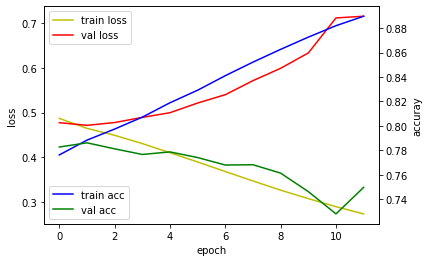

In [20]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=100,
                    batch_size=512,
                    validation_data=(x_val, y_val), callbacks = [early_stopping])
results = model.evaluate(x_test, y_test)



#fit 함수의 아웃풋은 history
history_dict = history.history
history_dict.keys()


fig, loss_ax = plt.subplots()


acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')


acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')


plt.show()

In [29]:
model.evaluate(x_test, y_test)

73913/73913 [==============================] - 18s 248us/step


[0.7101871550039613, 0.7512075304985046]

In [22]:
from keras.models import load_model
model.save('spoiler_detect_model.h5')

In [26]:
type(test_data)

list

In [31]:
model2 = models.Sequential()
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=100,
                    batch_size=5000,
                    validation_data=(x_val, y_val), callbacks = [early_stopping])
results2 = model2.evaluate(x_test, y_test)

Train on 400000 samples, validate on 100000 samples
Epoch 1/100
400000/400000 [==============================] - 166s 414us/step - loss: 0.5250 - accuracy: 0.7535 - val_loss: 0.4922 - val_accuracy: 0.7751
Epoch 2/100
400000/400000 [==============================] - 161s 403us/step - loss: 0.4815 - accuracy: 0.7776 - val_loss: 0.4761 - val_accuracy: 0.7815
Epoch 3/100
400000/400000 [==============================] - 170s 425us/step - loss: 0.4670 - accuracy: 0.7850 - val_loss: 0.4721 - val_accuracy: 0.7847
Epoch 4/100
400000/400000 [==============================] - 171s 428us/step - loss: 0.4548 - accuracy: 0.7909 - val_loss: 0.4757 - val_accuracy: 0.7840
Epoch 5/100
400000/400000 [==============================] - 200s 501us/step - loss: 0.4420 - accuracy: 0.7977 - val_loss: 0.4788 - val_accuracy: 0.7852
Epoch 6/100
400000/400000 [==============================] - 208s 519us/step - loss: 0.4292 - accuracy: 0.8043 - val_loss: 0.4747 - val_accuracy: 0.7823
Epoch 7/100
400000/400000 [===

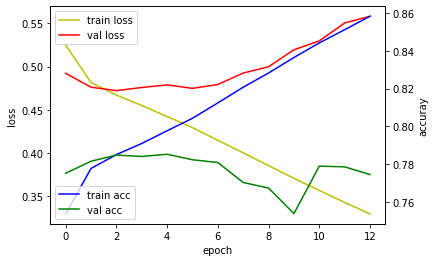

In [32]:

#fit 함수의 아웃풋은 history
history_dict = history2.history
history_dict.keys()


fig, loss_ax = plt.subplots()


acc_ax = loss_ax.twinx()

loss_ax.plot(history2.history['loss'], 'y', label='train loss')
loss_ax.plot(history2.history['val_loss'], 'r', label='val loss')


acc_ax.plot(history2.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history2.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')


plt.show()

In [33]:
results = model2.evaluate(x_test, y_test)

73913/73913 [==============================] - 9s 118us/step


In [34]:
results

[0.5542793219944278, 0.7749651670455933]

In [46]:
model2.save('spoiler_detect_model2.h5')

In [36]:
model3 = models.Sequential()
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model3.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=100,
                    batch_size=5000,
                    validation_data=(x_val, y_val))
results3 = model3.evaluate(x_test, y_test)

Train on 400000 samples, validate on 100000 samples
Epoch 1/100
400000/400000 [==============================] - 260s 651us/step - loss: 0.5324 - accuracy: 0.7530 - val_loss: 0.4886 - val_accuracy: 0.7740
Epoch 2/100
400000/400000 [==============================] - 192s 480us/step - loss: 0.4801 - accuracy: 0.7785 - val_loss: 0.4731 - val_accuracy: 0.7830
Epoch 3/100
400000/400000 [==============================] - 190s 476us/step - loss: 0.4615 - accuracy: 0.7874 - val_loss: 0.4857 - val_accuracy: 0.7775
Epoch 4/100
400000/400000 [==============================] - 182s 456us/step - loss: 0.4430 - accuracy: 0.7961 - val_loss: 0.4751 - val_accuracy: 0.7870
Epoch 5/100
400000/400000 [==============================] - 200s 499us/step - loss: 0.4178 - accuracy: 0.8089 - val_loss: 0.4877 - val_accuracy: 0.7856
Epoch 6/100
400000/400000 [==============================] - 178s 446us/step - loss: 0.3863 - accuracy: 0.8255 - val_loss: 0.4851 - val_accuracy: 0.7764
Epoch 7/100
400000/400000 [===

Epoch 54/100
400000/400000 [==============================] - 187s 468us/step - loss: 0.0644 - accuracy: 0.9905 - val_loss: 1.8030 - val_accuracy: 0.7511
Epoch 55/100
400000/400000 [==============================] - 199s 497us/step - loss: 0.0693 - accuracy: 0.9908 - val_loss: 1.7167 - val_accuracy: 0.7455
Epoch 56/100
400000/400000 [==============================] - 204s 509us/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 1.9488 - val_accuracy: 0.7509
Epoch 57/100
400000/400000 [==============================] - 202s 506us/step - loss: 0.0515 - accuracy: 0.9909 - val_loss: 1.8589 - val_accuracy: 0.7517
Epoch 58/100
400000/400000 [==============================] - 191s 477us/step - loss: 0.0573 - accuracy: 0.9944 - val_loss: 1.7180 - val_accuracy: 0.7471
Epoch 59/100
400000/400000 [==============================] - 201s 503us/step - loss: 0.0596 - accuracy: 0.9911 - val_loss: 1.7069 - val_accuracy: 0.7454
Epoch 60/100
400000/400000 [==============================] - 190s 475us/ste

In [37]:
results3

[2.264640515553779, 0.7530069351196289]

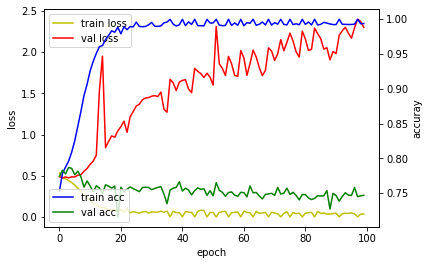

In [38]:
fig, loss_ax = plt.subplots()


acc_ax = loss_ax.twinx()

loss_ax.plot(history3.history['loss'], 'y', label='train loss')
loss_ax.plot(history3.history['val_loss'], 'r', label='val loss')


acc_ax.plot(history3.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history3.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')


plt.show()

In [54]:
import keras.backend.tensorflow_backend as K
import tensorflow as tf

K._get_available_gpus()
# with Keras_GPU.tf.device('/gpu:0'):
#     model4 = models.Sequential()
#     model4.compile(optimizer='rmsprop',
#                   loss='binary_crossentropy',
#                   metrics=['accuracy'])
#     model4.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
#     model4.add(layers.Dense(32, activation='relu'))
#     model4.add(layers.Dense(1, activation='sigmoid'))

#     history4 = model4.fit(partial_x_train,
#                         partial_y_train,
#                         epochs=100,
#                         batch_size=512,
#                         validation_data=(x_val, y_val))
#     results4= model4.evaluate(x_test, y_test)

[]

In [47]:
model3.save('spoiler_detect_model3.h5')

In [66]:
x_val = x_train[170000:190000]
partial_x_train = x_train[50000:70000]
y_val = y_train[170000:190000]
partial_y_train = y_train[50000:70000]

model4 = models.Sequential()
model4.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])
model4.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model4.add(layers.Dense(32, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

history4 = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val))
results4 = model4.evaluate(x_test, y_test)

Train on 20000 samples, validate on 20000 samples
Epoch 1/50
20000/20000 [==============================] - 18s 876us/step - loss: 0.1752 - accuracy: 0.7549 - val_loss: 0.1722 - val_accuracy: 0.7635
Epoch 2/50
20000/20000 [==============================] - 7s 363us/step - loss: 0.1304 - accuracy: 0.8212 - val_loss: 0.1773 - val_accuracy: 0.7484
Epoch 3/50
20000/20000 [==============================] - 7s 347us/step - loss: 0.0829 - accuracy: 0.8984 - val_loss: 0.1936 - val_accuracy: 0.7365
Epoch 4/50
20000/20000 [==============================] - 7s 345us/step - loss: 0.0402 - accuracy: 0.9571 - val_loss: 0.2077 - val_accuracy: 0.7366
Epoch 5/50
20000/20000 [==============================] - 7s 346us/step - loss: 0.0180 - accuracy: 0.9827 - val_loss: 0.2152 - val_accuracy: 0.7372
Epoch 6/50
20000/20000 [==============================] - 7s 341us/step - loss: 0.0110 - accuracy: 0.9886 - val_loss: 0.2253 - val_accuracy: 0.7228
Epoch 7/50
20000/20000 [==============================] - 7s 

In [67]:
results4

[0.238380039151781, 0.7493133544921875]

In [91]:
from keras.models import load_model
model1 = load_model('spoiler_detect_model.h5')

In [155]:
a = "Iron Man will die"
b = "Tommy kill his friend end of this movie. many people dead"
c = "I cried throughout the movie"
d = "Blue team will win"
e = "Frank finally escape the island"
f = "This movie is very bad. I hate it very much"
rvs = [a,b,c,d,e,f]

In [156]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results
x = remove_values_from_list(tokenizer.texts_to_sequences(rvs),None)
x_t = vectorize_sequences(x)


In [108]:
# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)


y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

test_num = 400000
x_val = x_train[test_num:]
partial_x_train = x_train[:test_num]
y_val = y_train[test_num:]
partial_y_train = y_train[:test_num]

In [116]:


import matplotlib.pyplot as plt

from keras import models
from keras import layers
model4 = models.Sequential()

model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model4.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model4.add(layers.Dense(32, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))



history4 = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_val, y_val))
results4 = model4.evaluate(x_test, y_test)

Train on 400000 samples, validate on 100000 samples
Epoch 1/50
400000/400000 [==============================] - 191s 477us/step - loss: 0.4917 - accuracy: 0.7743 - val_loss: 0.4764 - val_accuracy: 0.7845
Epoch 2/50
400000/400000 [==============================] - 198s 494us/step - loss: 0.4564 - accuracy: 0.7945 - val_loss: 0.4753 - val_accuracy: 0.7852
Epoch 3/50
400000/400000 [==============================] - 196s 490us/step - loss: 0.4181 - accuracy: 0.8164 - val_loss: 0.4911 - val_accuracy: 0.7825
Epoch 4/50
400000/400000 [==============================] - 195s 487us/step - loss: 0.3465 - accuracy: 0.8554 - val_loss: 0.5416 - val_accuracy: 0.7700
Epoch 5/50
400000/400000 [==============================] - 194s 485us/step - loss: 0.2547 - accuracy: 0.8995 - val_loss: 0.6379 - val_accuracy: 0.7610
Epoch 6/50
400000/400000 [==============================] - 192s 481us/step - loss: 0.1728 - accuracy: 0.9360 - val_loss: 0.7902 - val_accuracy: 0.7483
Epoch 7/50
400000/400000 [==========

In [161]:
ps = model3.predict_classes(x_t)
for i in range(6):
    if(ps[i][0]):
        iss = "yes" 
    else: 
        iss = "no"
    print("Review: "+ str(rvs[i])+"\n -> Is spoiler? : " + iss)

Review: Iron Man will die
 -> Is spoiler? : yes
Review: Tommy kill his friend end of this movie. many people dead
 -> Is spoiler? : yes
Review: I cried throughout the movie
 -> Is spoiler? : no
Review: Blue team will win
 -> Is spoiler? : yes
Review: Frank finally escape the island
 -> Is spoiler? : yes
Review: This movie is very bad. I hate it very much
 -> Is spoiler? : no
